In [2]:
from pycaret.classification import *
import pandas as pd

In [9]:
dataset = pd.read_csv('E:/Machine_Learning/LoanPrediction/loan__dataset_train.csv')
dataset

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [13]:
data = dataset.sample(frac=0.75, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)


In [14]:
clf1 = setup(data = data, target = 'Loan_Status')

 
Setup Succesfully Completed!


In [15]:
clf1

(     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_ID_LP001002  \
 0             4583.0             1508.0       128.0               0.0   
 1             2600.0             1911.0       116.0               0.0   
 2             8750.0             4167.0       308.0               0.0   
 3             2500.0                0.0        93.0               0.0   
 4             5818.0             2160.0       184.0               0.0   
 ..               ...                ...         ...               ...   
 455           3399.0             1640.0       111.0               0.0   
 456           5703.0                0.0       128.0               0.0   
 457           1836.0            33837.0        90.0               0.0   
 458           7583.0                0.0       187.0               0.0   
 459           6000.0                0.0       205.0               0.0   
 
      Loan_ID_LP001003  Loan_ID_LP001008  Loan_ID_LP001013  Loan_ID_LP001018  \
 0                 1.0        

In [16]:
compare_models()

In [17]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8788  0.8368  1.0000  0.8462  0.9167  0.7000
1       0.7500  0.7294  1.0000  0.7241  0.8400  0.3298
2       0.8438  0.7364  1.0000  0.8148  0.8980  0.5789
3       0.7812  0.7818  0.9545  0.7778  0.8571  0.4105
4       0.9062  0.8705  1.0000  0.8800  0.9362  0.7624
5       0.8438  0.7773  1.0000  0.8148  0.8980  0.5789
6       0.8438  0.8682  1.0000  0.8148  0.8980  0.5789
7       0.8125  0.7795  1.0000  0.7857  0.8800  0.4783
8       0.8125  0.7750  1.0000  0.7857  0.8800  0.4783
9       0.7500  0.6023  0.9545  0.7500  0.8400  0.3043
Mean    0.8223  0.7757  0.9909  0.7994  0.8844  0.5200
SD      0.0489  0.0742  0.0182  0.0428  0.0300  0.1413

In [18]:
tuned_gbc = tune_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8788  0.7934  1.0000  0.8462  0.9167  0.7000
1       0.7500  0.7446  1.0000  0.7241  0.8400  0.3298
2       0.8438  0.7182  1.0000  0.8148  0.8980  0.5789
3       0.7188  0.6545  0.9091  0.7407  0.8163  0.2421
4       0.9062  0.8545  1.0000  0.8800  0.9362  0.7624
5       0.8438  0.7909  1.0000  0.8148  0.8980  0.5789
6       0.7500  0.7273  0.9545  0.7500  0.8400  0.3043
7       0.8125  0.6955  1.0000  0.7857  0.8800  0.4783
8       0.8125  0.7409  1.0000  0.7857  0.8800  0.4783
9       0.7500  0.6500  0.9545  0.7500  0.8400  0.3043
Mean    0.8066  0.7370  0.9818  0.7892  0.8745  0.4757
SD      0.0594  0.0604  0.0302  0.0474  0.0370  0.1698

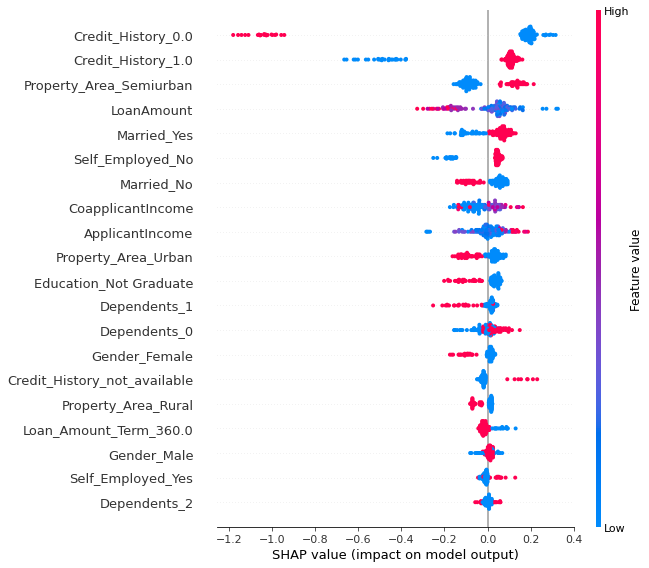

In [20]:
interpret_model(tuned_gbc)


In [21]:
calibrated_gbc = calibrate_model(tuned_gbc)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8788  0.8471  1.0000  0.8462  0.9167  0.7000
1       0.7188  0.6883  0.9524  0.7143  0.8163  0.2653
2       0.8438  0.7227  1.0000  0.8148  0.8980  0.5789
3       0.7500  0.7091  0.9091  0.7692  0.8333  0.3469
4       0.9062  0.9455  1.0000  0.8800  0.9362  0.7624
5       0.8438  0.7455  1.0000  0.8148  0.8980  0.5789
6       0.8438  0.8227  1.0000  0.8148  0.8980  0.5789
7       0.8125  0.6955  1.0000  0.7857  0.8800  0.4783
8       0.8125  0.7773  1.0000  0.7857  0.8800  0.4783
9       0.7500  0.5091  0.9545  0.7500  0.8400  0.3043
Mean    0.8160  0.7463  0.9816  0.7976  0.8796  0.5072
SD      0.0571  0.1099  0.0304  0.0451  0.0365  0.1564

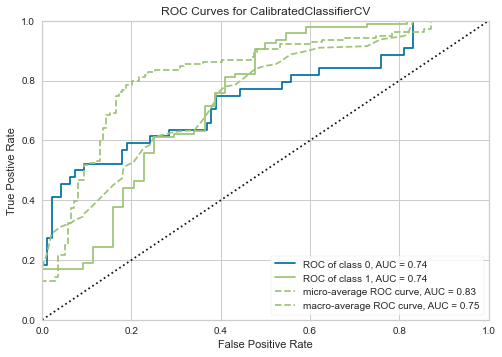

In [22]:
plot_model(calibrated_gbc)

In [23]:
optimize_threshold(calibrated_gbc,true_negative=1000,false_negative=-1000)

Optimized Probability Threshold: 0.5 | Optimized Cost Function: 16000


In [24]:
pred_holdout = predict_model(calibrated_gbc)
pred_holdout

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa
0  Calibrated Classifier C V    0.7986  0.7438  0.9789  0.7815  0.8692  0.4546

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_ID_LP001002  \
0            11250.0                0.0  196.000000               0.0   
1             2395.0                0.0  149.517937               0.0   
2             2699.0             2785.0   96.000000               0.0   
3             1600.0            20000.0  239.000000               0.0   
4             3593.0             4266.0  132.000000               0.0   
..               ...                ...         ...               ...   
134           4167.0             1447.0  158.000000               0.0   
135           5677.0             1424.0  100.000000               0.0   
136           8566.0                0.0  210.000000               0.0   
137          39999.0                0.0  600.000000               0.0   
138          16667.0             2250.0   86.000000               0.0   

     Loan_ID_LP001003  Loan_ID_LP001008  Loan_ID_LP001013  Loan_ID_LP001018  \
0                 0.0               0.0               0.0               0.0   
1                 0.0               0.0               0.0               0.0   
2                 0.0               0.0               0.0               0.0   
3                 0.0               0.0               0.0               0.0   
4                 0.0               0.0               0.0               0.0   
..                ...               ...               ...               ...   
134               0.0               0.0               0.0               0.0   
135               0.0               0.0               0.0               0.0   
136               0.0               0.0               0.0               0.0   
137               0.0               0.0               0.0               0.0   
138               0.0               0.0               0.0               0.0   

     Loan_ID_LP001020  Loan_ID_LP001024  ...  Loan_Amount_Term_not_available  \
0                 0.0               0.0  ...                             0.0   
1                 0.0               0.0  ...                             0.0   
2                 0.0               0.0  ...                             0.0   
3                 0.0               0.0  ...                             0.0   
4                 0.0               0.0  ...                             0.0   
..                ...               ...  ...                             ...   
134               0.0               0.0  ...                             0.0   
135               0.0               0.0  ...                             0.0   
136               0.0               0.0  ...                             0.0   
137               0.0               0.0  ...                             0.0   
138               0.0               0.0  ...                             0.0   

     Credit_History_0.0  Credit_History_1.0  Credit_History_not_available  \
0                   0.0                 0.0                           1.0   
1                   0.0                 1.0                           0.0   
2                   0.0                 0.0                           1.0   
3                   0.0                 1.0                           0.0   
4                   1.0                 0.0                           0.0   
..                  ...                 ...                           ...   
134                 0.0                 1.0                           0.0   
135                 0.0                 1.0                           0.0   
136                 0.0                 1.0                           0.0   
137                 1.0                 0.0                           0.0   
138                 0.0                 1.0                           0.0   

     Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                    0.0                      1.0                  0.0   
1                    0.0                      1.0                  0.0   
2                    0.0                      1.0                  0.0 

In [25]:
final_gbc = finalize_model(calibrated_gbc)
final_gbc

CalibratedClassifierCV(base_estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                                 criterion='friedman_mse',
                                                                 init=None,
                                                                 learning_rate=0.05,
                                                                 loss='deviance',
                                                                 max_depth=80,
                                                                 max_features='sqrt',
                                                                 max_leaf_nodes=None,
                                                                 min_impurity_decrease=0.0,
                                                                 min_impurity_split=None,
                                                                 min_samples_leaf=2,
                                                                 min

In [55]:
save_model(calibrated_gbc, 'calib_saved_rf_26062020')

Transformation Pipeline and Model Succesfully Saved


In [57]:
rf_saved = load_model('calib_saved_rf_26062020')
rf_saved

Transformation Pipeline and Model Sucessfully Loaded


[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Loan_Status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorica...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()),
                 ('dummy', Dummify(target='Loan_Status')),
                 ('fix_perfect', Remove_100(target='Loan_Status')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              class_weight=None,
                                                              criterion='gini',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              n_estimators=10,
                                                              n_jobs=None,
                                                              oob_score=False,
                                                              random_state=6156,
                                                              verbose=0,
                                                              warm_start=False),
                        cv=10, method='sigmoid')]